In [1]:
import pandas as pd

In [174]:
titanic = pd.read_csv('titanic.csv')

In [175]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
titanic.shape

(891, 12)

In [176]:
drop_columns = ['PassengerId', 'Ticket', 'Fare', 'Cabin']


In [177]:
titanic.drop(drop_columns, axis = 1, inplace = True)

In [178]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


In [170]:
titanic_sub = titanic.iloc[1:5,]

In [32]:
titanic_sub.index = ['a', 'b', 'c', 'd']

In [10]:
titanic_sub

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
a,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
b,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
c,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
d,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


In [11]:
titanic.iloc[1:3,]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S


In [12]:
titanic.shape

(891, 8)

In [180]:
def get_number(x):
    if x == 'male':
        return 1
    else:
        return 0
    
titanic['Gender'] = titanic.Sex.apply(get_number)

In [182]:
(titanic.Gender == 0).sum()

314

In [183]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
Gender        0
dtype: int64

In [185]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [186]:
mean_surv_1 = titanic[titanic['Survived'] == 1].Age.mean()
mean_surv_1

28.343689655172415

In [187]:
mean_not_surv_1 = titanic[titanic['Survived'] == 0].Age.mean()
mean_not_surv_1

30.62617924528302

In [188]:
import numpy as np
titanic['age'] = np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,mean_surv_1, titanic["Age"])

In [189]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
Gender        0
age         125
dtype: int64

In [190]:
titanic.age.fillna(mean_not_surv_1,inplace=True)

In [191]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
Gender        0
age           0
dtype: int64

In [192]:
titanic.drop('Age', axis=1, inplace=True)

In [193]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [194]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [195]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

47
75
427


C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [196]:
titanic.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [197]:
mode_emb = titanic.Embarked.mode()
mode_emb[0]

'S'

In [198]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [199]:
titanic.Embarked.fillna(mode_emb[0], inplace = True)

In [143]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Embarked    0
age         0
dtype: int64

In [200]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['Embarked'])
label_encoded_embarked = le.transform(titanic['Embarked'])

In [201]:
titanic['Embark'] = label_encoded_embarked 

In [202]:
titanic.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,Gender,age,Embark
0,0,3,"Braund, Mr. Owen Harris",male,1,0,S,1,22.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,0,38.0,0
2,1,3,"Heikkinen, Miss. Laina",female,0,0,S,0,26.0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,0,35.0,2
4,0,3,"Allen, Mr. William Henry",male,0,0,S,1,35.0,2


In [203]:
import matplotlib.pyplot as plt

In [205]:
male_count = (titanic.Gender==1).sum()
male_count

577

In [206]:
female_count = (titanic.Gender==0).sum()
female_count

314

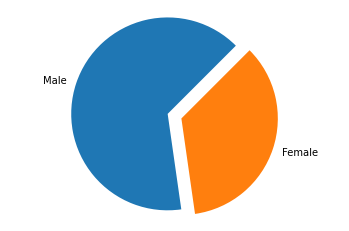

In [215]:
plt.pie([male_count, female_count],
       labels = ['Male', 'Female'],
       explode = (0.15, 0),
       startangle = 45)
plt.axis('equal') 
plt.show()

In [240]:
survived_male_count = ((titanic.Gender == 1) & (titanic.Survived == 1)).sum()
survived_male_count

109

In [241]:
unsurvived_male_count = titanic[titanic.Gender == 1][titanic.Survived == 0].shape[0]
unsurvived_male_count

C:\Users\dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


468

In [242]:
survived_female_count = ((titanic.Gender == 0) & (titanic.Survived == 1)).sum()
survived_female_count

233

In [243]:
unsurvived_female_count = ((titanic.Gender == 0) & (titanic.Survived == 0)).sum()
unsurvived_female_count

81

In [244]:
input_data = [survived_male_count, unsurvived_male_count, survived_female_count, unsurvived_female_count]

([<matplotlib.patches.Wedge at 0x456cf16e10>,
 [Text(1.483282737703997, 0.5998935905886444, 's_m'),
  Text(-0.8249426088873366, 0.7276466807745053, 'u_s_m'),
  Text(0.1948313958491484, -1.0826082981353287, 's_f'),
  Text(1.5351887750486022, -0.45077203214571016, 'u_s_f')])

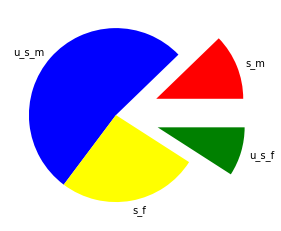

In [254]:
plt.pie(input_data, labels = ['s_m', 'u_s_m', 's_f', 'u_s_f'], colors = ['red', 'blue', 'yellow', 'green'], explode = (0.5, 0, 0, 0.5))